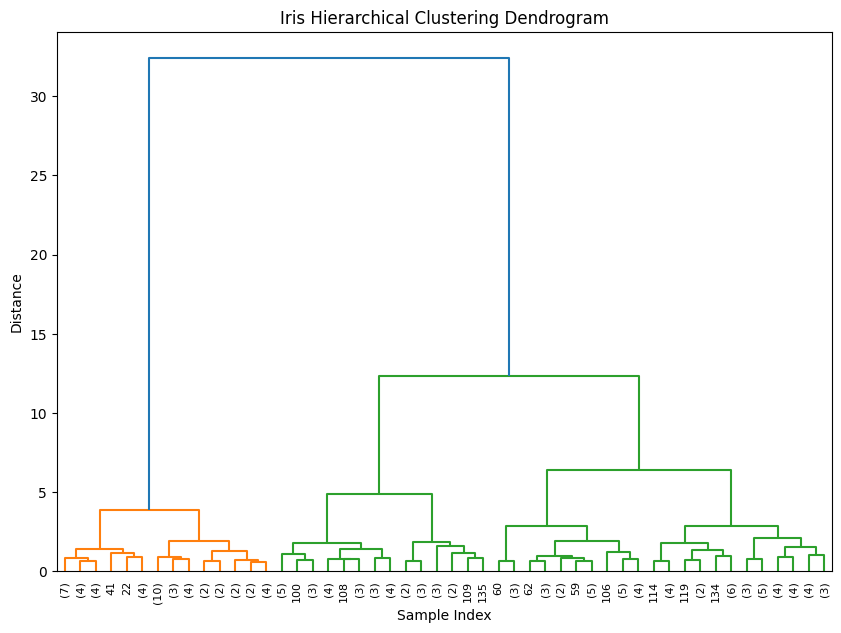

In [1]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering
Z = linkage(X, 'ward') # ward is a linkage technique which calculates Error Sum of Squares after merging clusters and determines the
#clusters which result in minimizing this ESS

# Plotting dendrogram
plt.figure(figsize=(10, 7))
plt.title("Iris Hierarchical Clustering Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=8.)
plt.show()


##The  linkage function calculates the distance between two clusters as the increase in the "error sum of squares" (ESS) after merging them.

##The Ward approach analyzes the variance of the clusters rather than measuring distances directly.

##The distance between two clusters is related to how much the sum of squares (SS) value will increase when the clusters will be combined.

##At each step, the pair of clusters with minimum between-cluster distance are merged.

##Ward's method aims to minimize the total within-cluster variance

In [2]:
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import numpy as np

# Generate 10 points between 0 and 1
points1 = np.random.uniform(low=[0, 0], high=[1, 1], size=(10, 2))

# Generate 10 points between 4 and 5
points2 = np.random.uniform(low=[4, 4], high=[5, 5], size=(10, 2))

# Generate 10 points between 9 and 10
points3 = np.random.uniform(low=[9, 9], high=[10, 10], size=(10, 2))

# Combine all points into one array
X= np.concatenate((points1, points2, points3), axis=0)


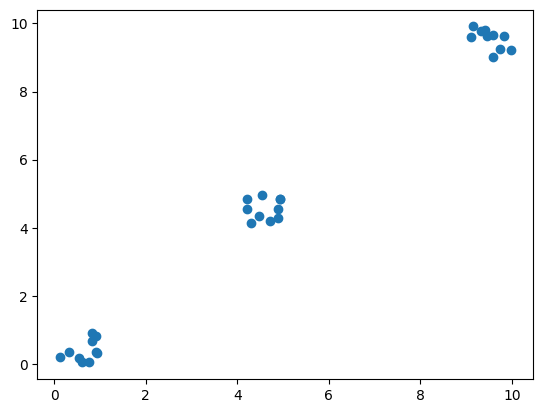

In [4]:
x = [point[0] for point in X]
y = [point[1] for point in X]

# Plot the points
plt.scatter(x, y)
plt.show()

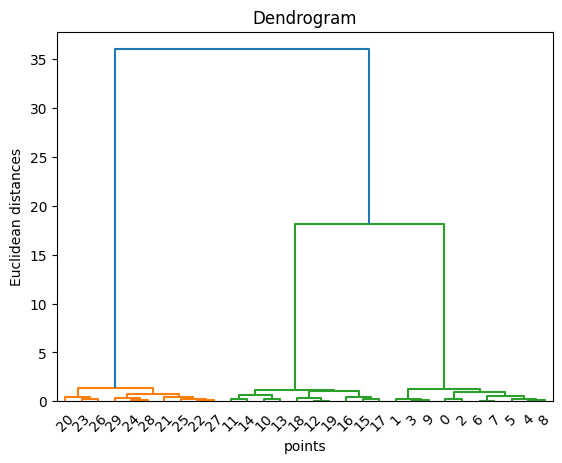

In [5]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('points')
plt.ylabel('Euclidean distances')
plt.show()

##Fitting Agglomerative Hierarchical Clustering to the dataset


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


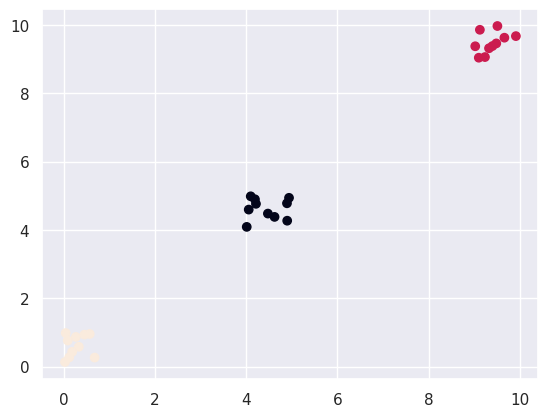

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_hc)
plt.show()

In [1]:
#Divisive Hierarchical  Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


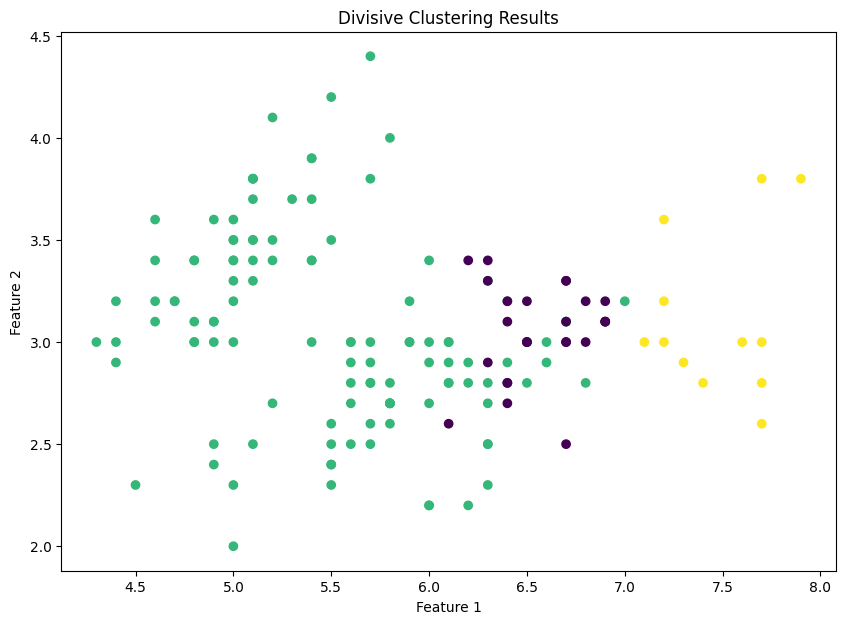

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Initialize labels to distinguish between points
labels = pd.Series([0] * len(X), name='Cluster')

# Function to perform divisive clustering
def divisive_clustering(X, labels, current_cluster, max_clusters):
    if len(labels.unique()) >= max_clusters:
        return labels

    # Select data points belonging to the current cluster
    cluster_data = X[labels == current_cluster]

    # Apply k-means with K=2 to split the cluster
    kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_data)
    new_labels = kmeans.labels_

    # Update labels, assigning a new cluster ID to one of the splits
    new_cluster_id = labels.max() + 1
    labels[labels == current_cluster] = new_labels + current_cluster
    labels[labels == current_cluster + 1] = new_cluster_id

    # Recursively split the new clusters
    labels = divisive_clustering(X, labels, current_cluster, max_clusters)
    labels = divisive_clustering(X, labels, new_cluster_id, max_clusters)

    return labels

# Perform divisive clustering
max_clusters = 3  # Desired number of clusters
final_labels = divisive_clustering(X, labels, 0, max_clusters)

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis')
plt.title('Divisive Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
